# Decision tree classifier

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# now load the dataset from sklearn library
from sklearn.datasets import load_iris

In [3]:
IRIS = load_iris()

In [4]:
IRIS

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
# now take out the input data

X = IRIS['data']
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
# now we will take the input data
X = pd.DataFrame(IRIS['data'], columns = IRIS['feature_names'])
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
IRIS['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
# output

y = IRIS['target']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
y = pd.DataFrame(IRIS['target'], columns = ['target'])
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [10]:
# combine the data
Dataset1 = X.copy()
Dataset1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
Dataset1['target'] = y
Dataset1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
# to export the file in .csv format
Dataset1.to_csv("iris.csv")

In [13]:
# train test spliting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size= 0.75, random_state = 0)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112, 1)
(38, 1)


In [15]:
# we will not apply standardscaler here since

In [16]:
# Model Building
from sklearn.tree import DecisionTreeClassifier

In [17]:
model1 = DecisionTreeClassifier()

In [18]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
y_pred = model1.predict(X_test)

In [20]:
y_pred # predicted values

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [21]:
y_test # actual values

,target
114,2
62,1
33,0
107,2
7,0
100,2
40,0
86,1
76,1
71,1


In [22]:
# Performance checking
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9736842105263158


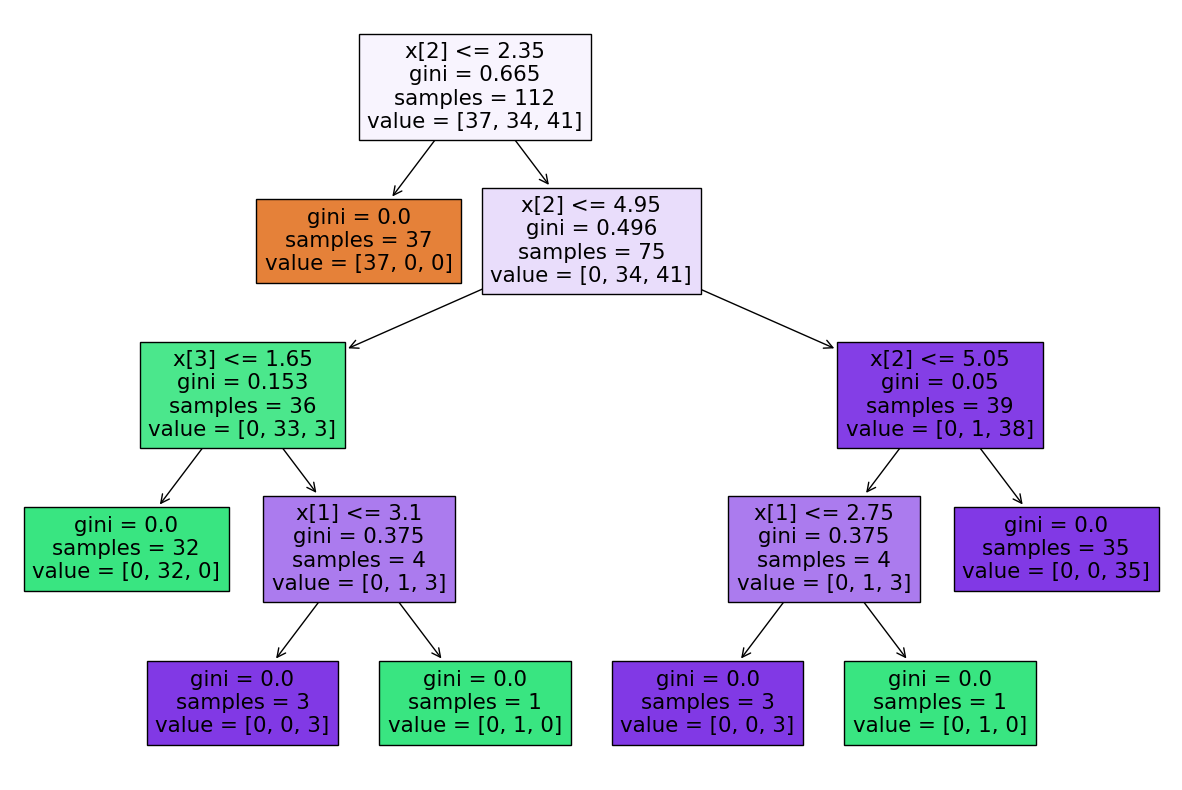

In [23]:
# plotting the decision tree
from sklearn import tree
plt.figure(figsize = (15, 10))
tree.plot_tree(model1, filled = True)
plt.show()

In [24]:
# Hometask: implement decision tree regression on weather.csv

# humidity is output column

# Decision tree regression

In [33]:
Dataset1 = pd.read_csv("/content/drive/MyDrive/MyPersonalDataset/Weather.csv")
Dataset1.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51


In [34]:
# splitting out dataset using drop
X = Dataset1.drop(columns = 'Humidity')
X

,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,14.1197,251,15.8263,1015.13
1,9.355556,7.227778,14.2646,259,15.8263,1015.63
2,9.377778,9.377778,3.9284,204,14.9569,1015.94
3,8.288889,5.944444,14.1036,269,15.8263,1016.41
4,8.755556,6.977778,11.0446,259,15.8263,1016.51
...,...,...,...,...,...,...
40994,15.372222,15.372222,6.1502,120,11.9784,1008.17
40995,15.327778,15.327778,3.2200,131,11.9784,1008.07
40996,16.066667,16.066667,10.8031,141,9.9820,1008.21
40997,15.955556,15.955556,11.8335,239,7.1323,1008.83


In [35]:
y = Dataset1[['Humidity']]
y

,Humidity
0,0.89
1,0.86
2,0.89
3,0.83
4,0.83
...,...
40994,0.93
40995,0.90
40996,0.88
40997,0.93


In [36]:
# train test splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32799, 6)
(8200, 6)
(32799, 1)
(8200, 1)


In [39]:
# Model Building
from sklearn.tree import DecisionTreeRegressor

In [41]:
model2 = DecisionTreeRegressor()

In [42]:
model2.fit(X_train,y_train)

DecisionTreeRegressor()

In [43]:
y_pred = model2.predict(X_test)

In [44]:
y_pred

array([0.93, 0.67, 0.35, ..., 0.94, 0.93, 0.89])

In [45]:
y_test # actual values

,Humidity
15555,0.90
32659,0.81
32484,0.35
17237,0.89
10281,0.87
...,...
26932,0.79
40330,0.57
23767,0.83
26648,0.55


In [48]:
# performance
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.5255746925910539


# Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model2 = RandomForestClassifier(n_estimators = 150)

In [27]:
# it will implement total 150 decision tree behind the seen

In [28]:
model2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150)

In [29]:
y_pred2 = model2.predict(X_test)

In [30]:
y_pred2 # random forest predicted output

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [31]:
y_test

,target
114,2
62,1
33,0
107,2
7,0
100,2
40,0
86,1
76,1
71,1


In [32]:
print(accuracy_score(y_test, y_pred2))

0.9736842105263158
